In [27]:
import pandas as pd
import matplotlib.pyplot as plt
import  seaborn as sns

In [28]:
df_exames = pd.read_csv('datasets/exame_diabetes.csv')

In [29]:
df_exames.head()

,id_paciente,genero,idade,peso,altura,resultado
0,1,M,46,83,165,98
1,2,F,23,83,164,82
2,3,M,39,71,154,93
3,4,F,26,103,165,95
4,5,M,27,55,176,100


In [30]:
df_exames.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   id_paciente  100 non-null    int64 
 1   genero       100 non-null    object
 2   idade        100 non-null    int64 
 3   peso         100 non-null    int64 
 4   altura       100 non-null    int64 
 5   resultado    100 non-null    int64 
dtypes: int64(5), object(1)
memory usage: 4.8+ KB


In [31]:
df_exames.genero.unique()

array(['M', 'F'], dtype=object)

In [32]:
# Remover coluna id_paciente
df_exames.drop('id_paciente', axis=1, inplace=True)

In [33]:
df_exames

,genero,idade,peso,altura,resultado
0,M,46,83,165,98
1,F,23,83,164,82
2,M,39,71,154,93
3,F,26,103,165,95
4,M,27,55,176,100
...,...,...,...,...,...
95,F,52,96,183,89
96,F,68,108,169,105
97,M,21,95,154,125
98,M,41,109,173,128


In [34]:
# one-hot encoding para genero
df_exames = pd.get_dummies(df_exames, columns=['genero'], dtype=int)

In [35]:
df_exames

,idade,peso,altura,resultado,genero_F,genero_M
0,46,83,165,98,0,1
1,23,83,164,82,1,0
2,39,71,154,93,0,1
3,26,103,165,95,1,0
4,27,55,176,100,0,1
...,...,...,...,...,...,...
95,52,96,183,89,1,0
96,68,108,169,105,1,0
97,21,95,154,125,0,1
98,41,109,173,128,0,1


In [38]:
df_exames.corr()

,idade,peso,altura,resultado,genero_F,genero_M
idade,1.000000,0.054941,0.051530,-0.025246,0.079949,-0.079949
peso,0.054941,1.000000,-0.074742,-0.053516,-0.096612,0.096612
altura,0.051530,-0.074742,1.000000,0.020726,-0.072300,0.072300
resultado,-0.025246,-0.053516,0.020726,1.000000,-0.145506,0.145506
genero_F,0.079949,-0.096612,-0.072300,-0.145506,1.000000,-1.000000
genero_M,-0.079949,0.096612,0.072300,0.145506,-1.000000,1.000000


<Axes: >

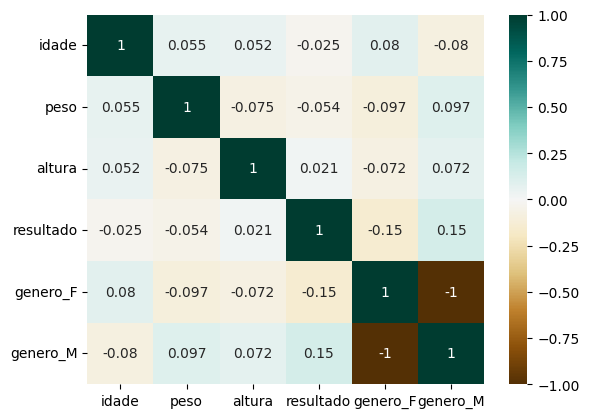

In [47]:
# Apresentar Mapa de calor ( Heatmap ) com a correlação entre as variáveis
sns.heatmap(df_exames.corr(), annot=True, cmap='BrBG', vmax=1, vmin=-1)

In [45]:
df_exames.corr()[['resultado']].sort_values(by='resultado', ascending=False)

,resultado
resultado,1.000000
genero_M,0.145506
altura,0.020726
idade,-0.025246
peso,-0.053516
genero_F,-0.145506


<Axes: >

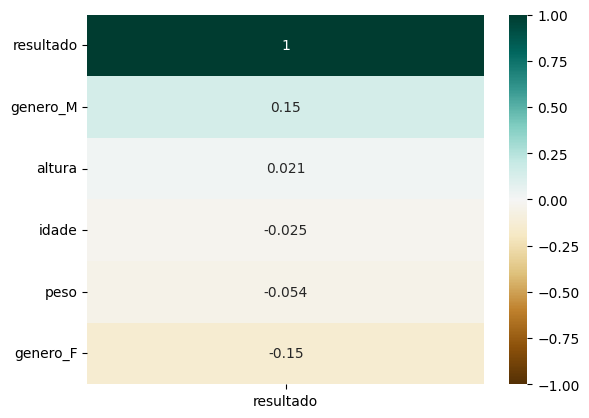

In [48]:
# Mapa de correlação só com a variável target (resultado)
sns.heatmap(df_exames.corr()[['resultado']].sort_values(by='resultado', ascending=False), annot=True, cmap='BrBG', vmax=1, vmin=-1)

array([[<Axes: xlabel='idade', ylabel='idade'>,
        <Axes: xlabel='peso', ylabel='idade'>,
        <Axes: xlabel='altura', ylabel='idade'>,
        <Axes: xlabel='resultado', ylabel='idade'>,
        <Axes: xlabel='genero_F', ylabel='idade'>,
        <Axes: xlabel='genero_M', ylabel='idade'>],
       [<Axes: xlabel='idade', ylabel='peso'>,
        <Axes: xlabel='peso', ylabel='peso'>,
        <Axes: xlabel='altura', ylabel='peso'>,
        <Axes: xlabel='resultado', ylabel='peso'>,
        <Axes: xlabel='genero_F', ylabel='peso'>,
        <Axes: xlabel='genero_M', ylabel='peso'>],
       [<Axes: xlabel='idade', ylabel='altura'>,
        <Axes: xlabel='peso', ylabel='altura'>,
        <Axes: xlabel='altura', ylabel='altura'>,
        <Axes: xlabel='resultado', ylabel='altura'>,
        <Axes: xlabel='genero_F', ylabel='altura'>,
        <Axes: xlabel='genero_M', ylabel='altura'>],
       [<Axes: xlabel='idade', ylabel='resultado'>,
        <Axes: xlabel='peso', ylabel='resultado'>,


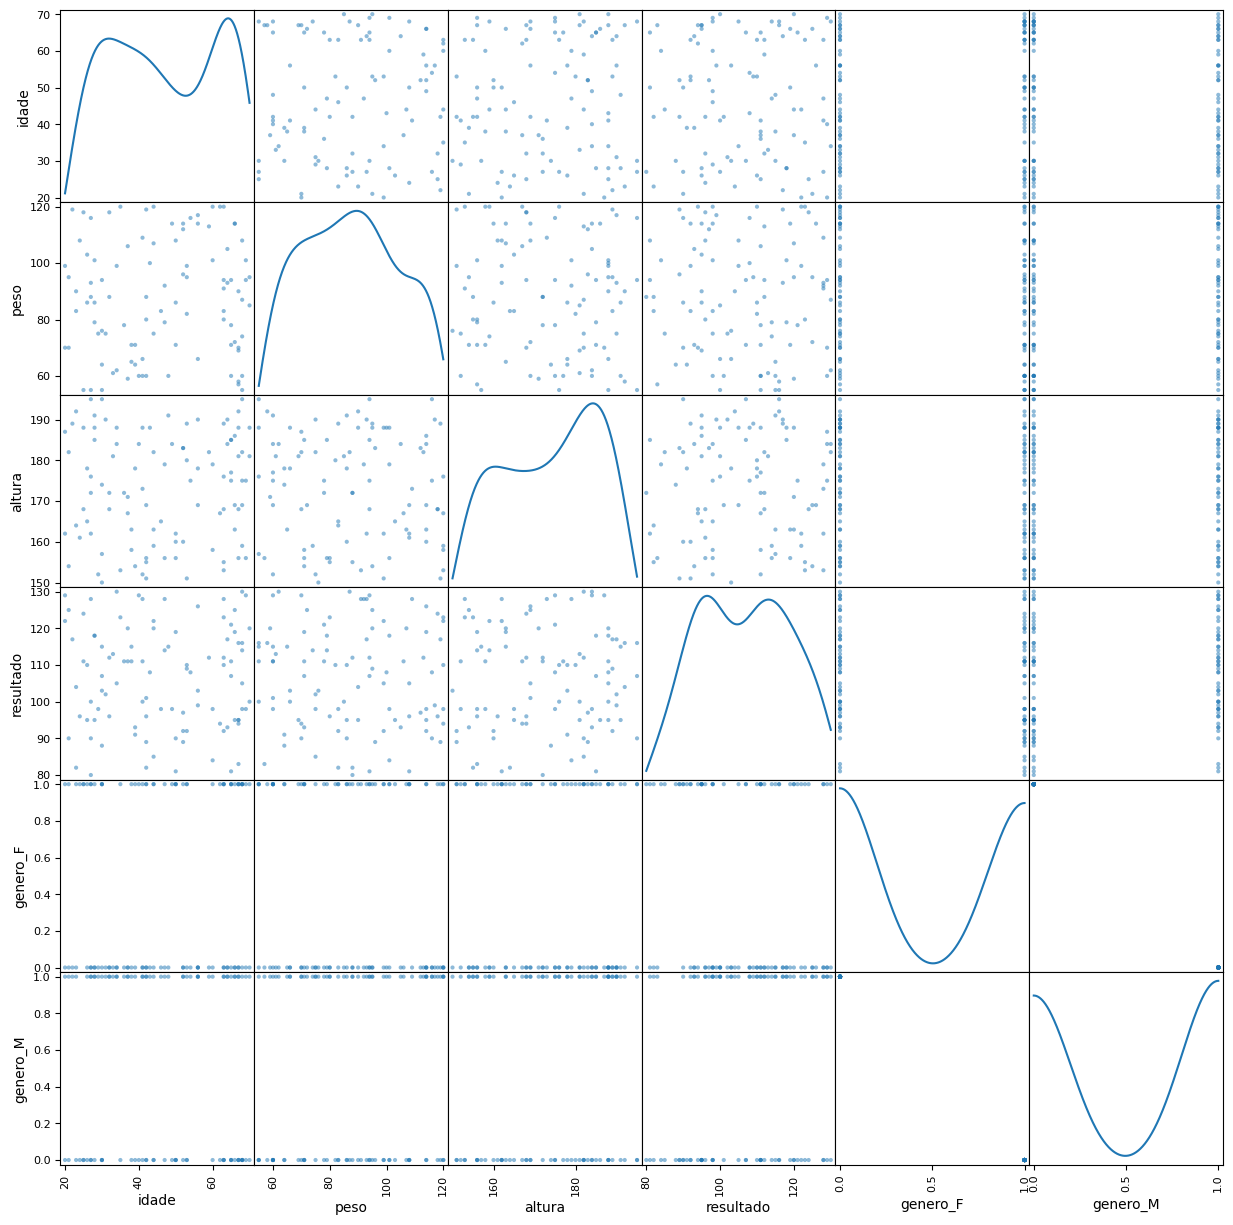

In [59]:
# Plot de Scatter (dispersão) com Distribuição
pd.plotting.scatter_matrix(df_exames, figsize=(15, 15), diagonal='kde')

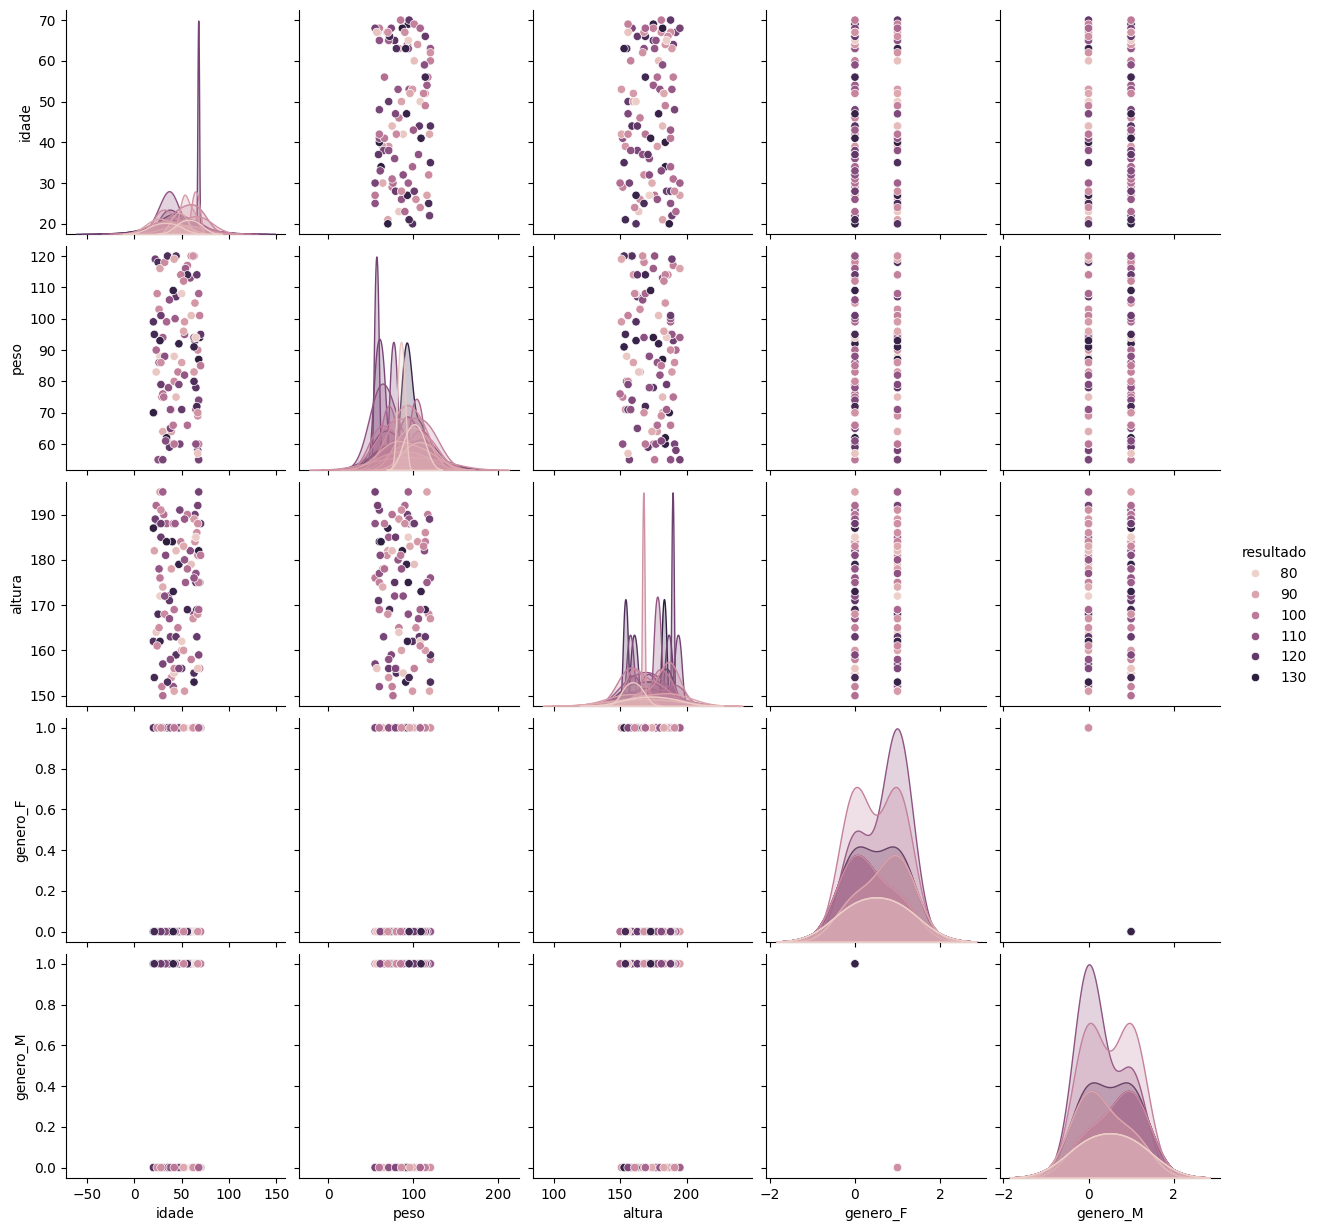

In [52]:
# Plot de Scatter (dispersão) com Distribuição
sns.pairplot(df_exames, hue='resultado')

array([[<Axes: title={'center': 'idade'}>,
        <Axes: title={'center': 'peso'}>,
        <Axes: title={'center': 'altura'}>],
       [<Axes: title={'center': 'resultado'}>,
        <Axes: title={'center': 'genero_F'}>,
        <Axes: title={'center': 'genero_M'}>]], dtype=object)

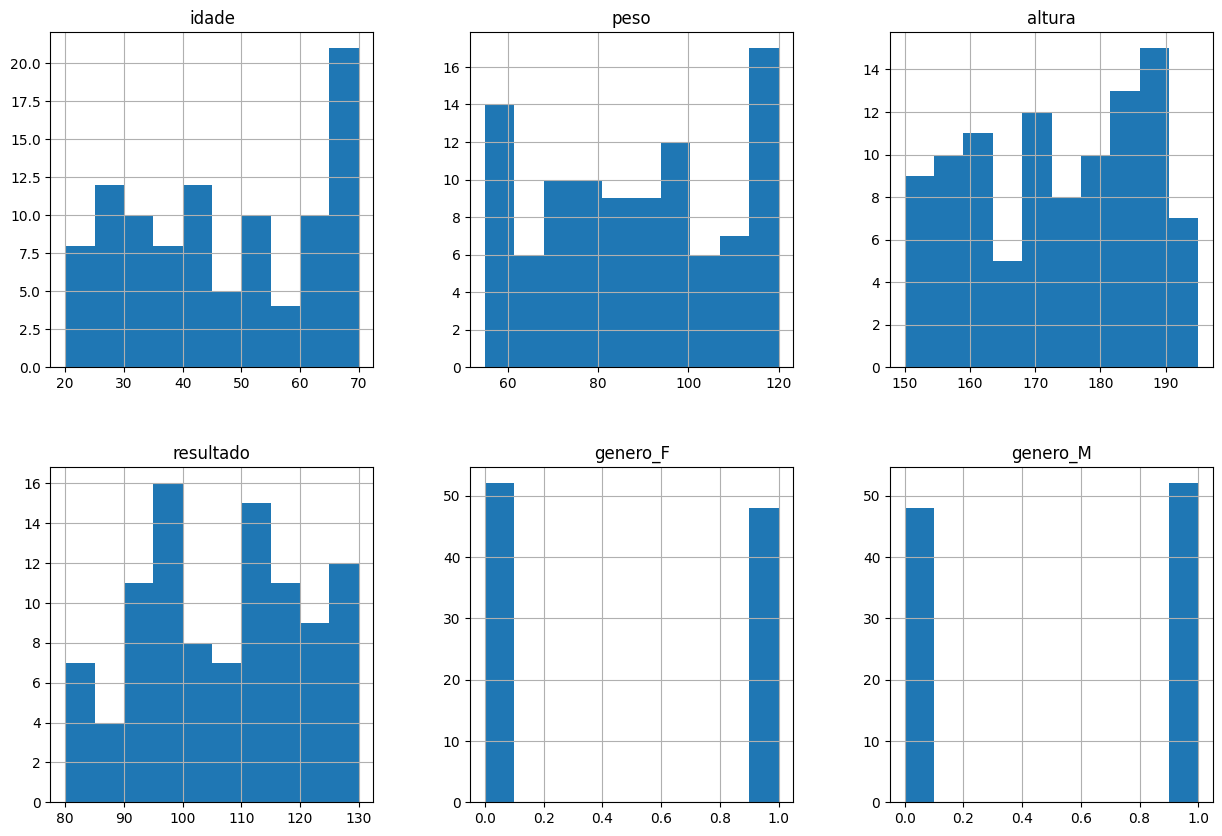

In [63]:
# Histograma de todas as variáveis
df_exames.hist(figsize=(15, 10), layout=(2, 3))

### Criar uma feature nova
- A feature nova é o IMC (Índice de Massa Corporal) que é calculado pela fórmula: IMC = peso / altura^2

In [65]:
# Criar feature IMC
df_exames['imc'] = df_exames['peso'] / ((df_exames['altura'] / 100) ** 2)

In [66]:
df_exames.head()

,idade,peso,altura,resultado,genero_F,genero_M,imc
0,46,83,165,98,0,1,30.486685
1,23,83,164,82,1,0,30.859607
2,39,71,154,93,0,1,29.937595
3,26,103,165,95,1,0,37.832874
4,27,55,176,100,0,1,17.755682


<Axes: >

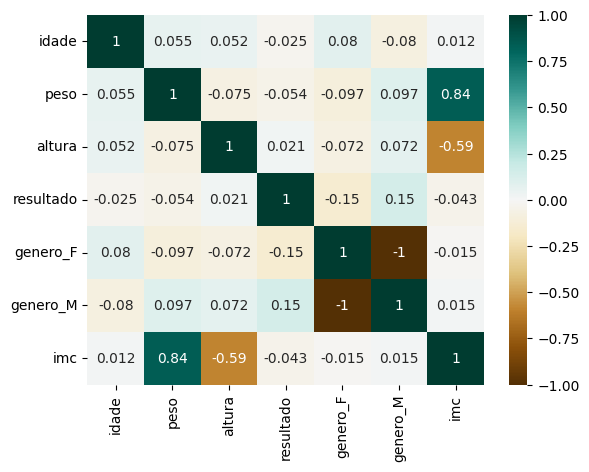

In [68]:
# Apresentar Mapa de calor ( Heatmap ) com a correlação entre as variáveis
sns.heatmap(df_exames.corr(), annot=True, cmap='BrBG', vmax=1, vmin=-1)

<Axes: >

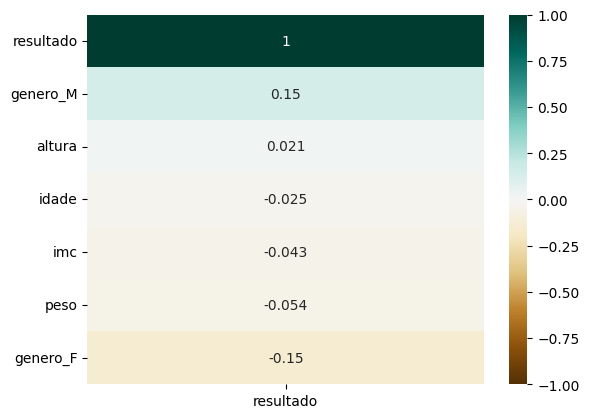

In [67]:
# Mapa de correlação só com a variável target (resultado)
sns.heatmap(df_exames.corr()[['resultado']].sort_values(by='resultado', ascending=False), annot=True, cmap='BrBG', vmax=1, vmin=-1)

array([[<Axes: xlabel='idade', ylabel='idade'>,
        <Axes: xlabel='peso', ylabel='idade'>,
        <Axes: xlabel='altura', ylabel='idade'>,
        <Axes: xlabel='resultado', ylabel='idade'>,
        <Axes: xlabel='genero_F', ylabel='idade'>,
        <Axes: xlabel='genero_M', ylabel='idade'>,
        <Axes: xlabel='imc', ylabel='idade'>],
       [<Axes: xlabel='idade', ylabel='peso'>,
        <Axes: xlabel='peso', ylabel='peso'>,
        <Axes: xlabel='altura', ylabel='peso'>,
        <Axes: xlabel='resultado', ylabel='peso'>,
        <Axes: xlabel='genero_F', ylabel='peso'>,
        <Axes: xlabel='genero_M', ylabel='peso'>,
        <Axes: xlabel='imc', ylabel='peso'>],
       [<Axes: xlabel='idade', ylabel='altura'>,
        <Axes: xlabel='peso', ylabel='altura'>,
        <Axes: xlabel='altura', ylabel='altura'>,
        <Axes: xlabel='resultado', ylabel='altura'>,
        <Axes: xlabel='genero_F', ylabel='altura'>,
        <Axes: xlabel='genero_M', ylabel='altura'>,
        <Axes

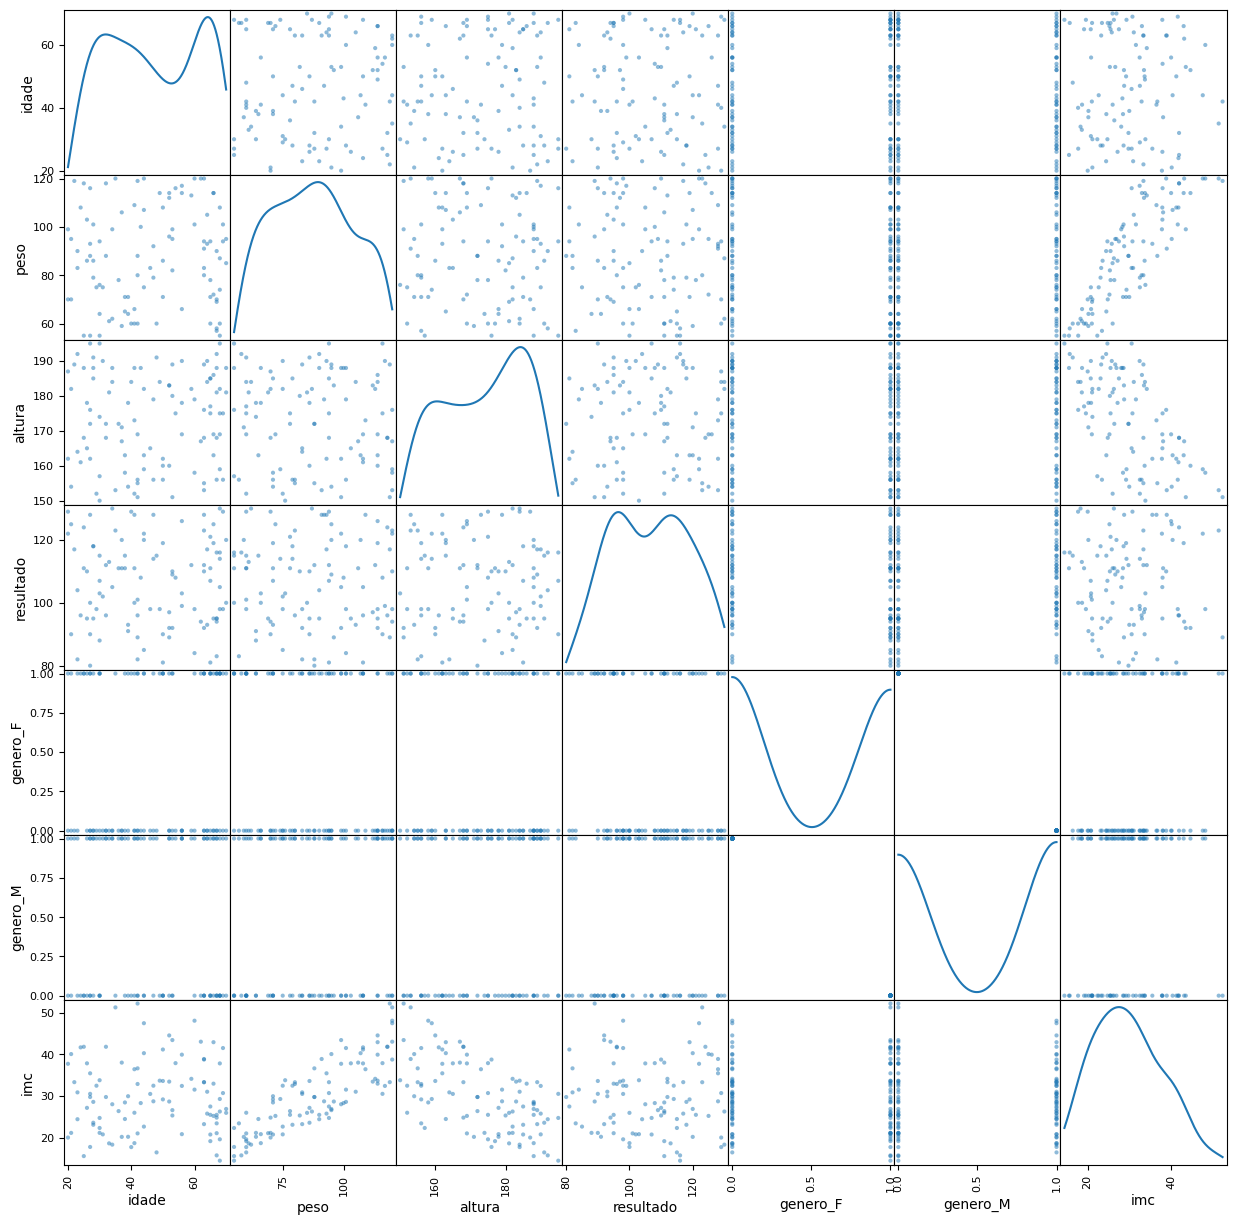

In [69]:
# Plot de Scatter (dispersão) com Distribuição
pd.plotting.scatter_matrix(df_exames, figsize=(15, 15), diagonal='kde')

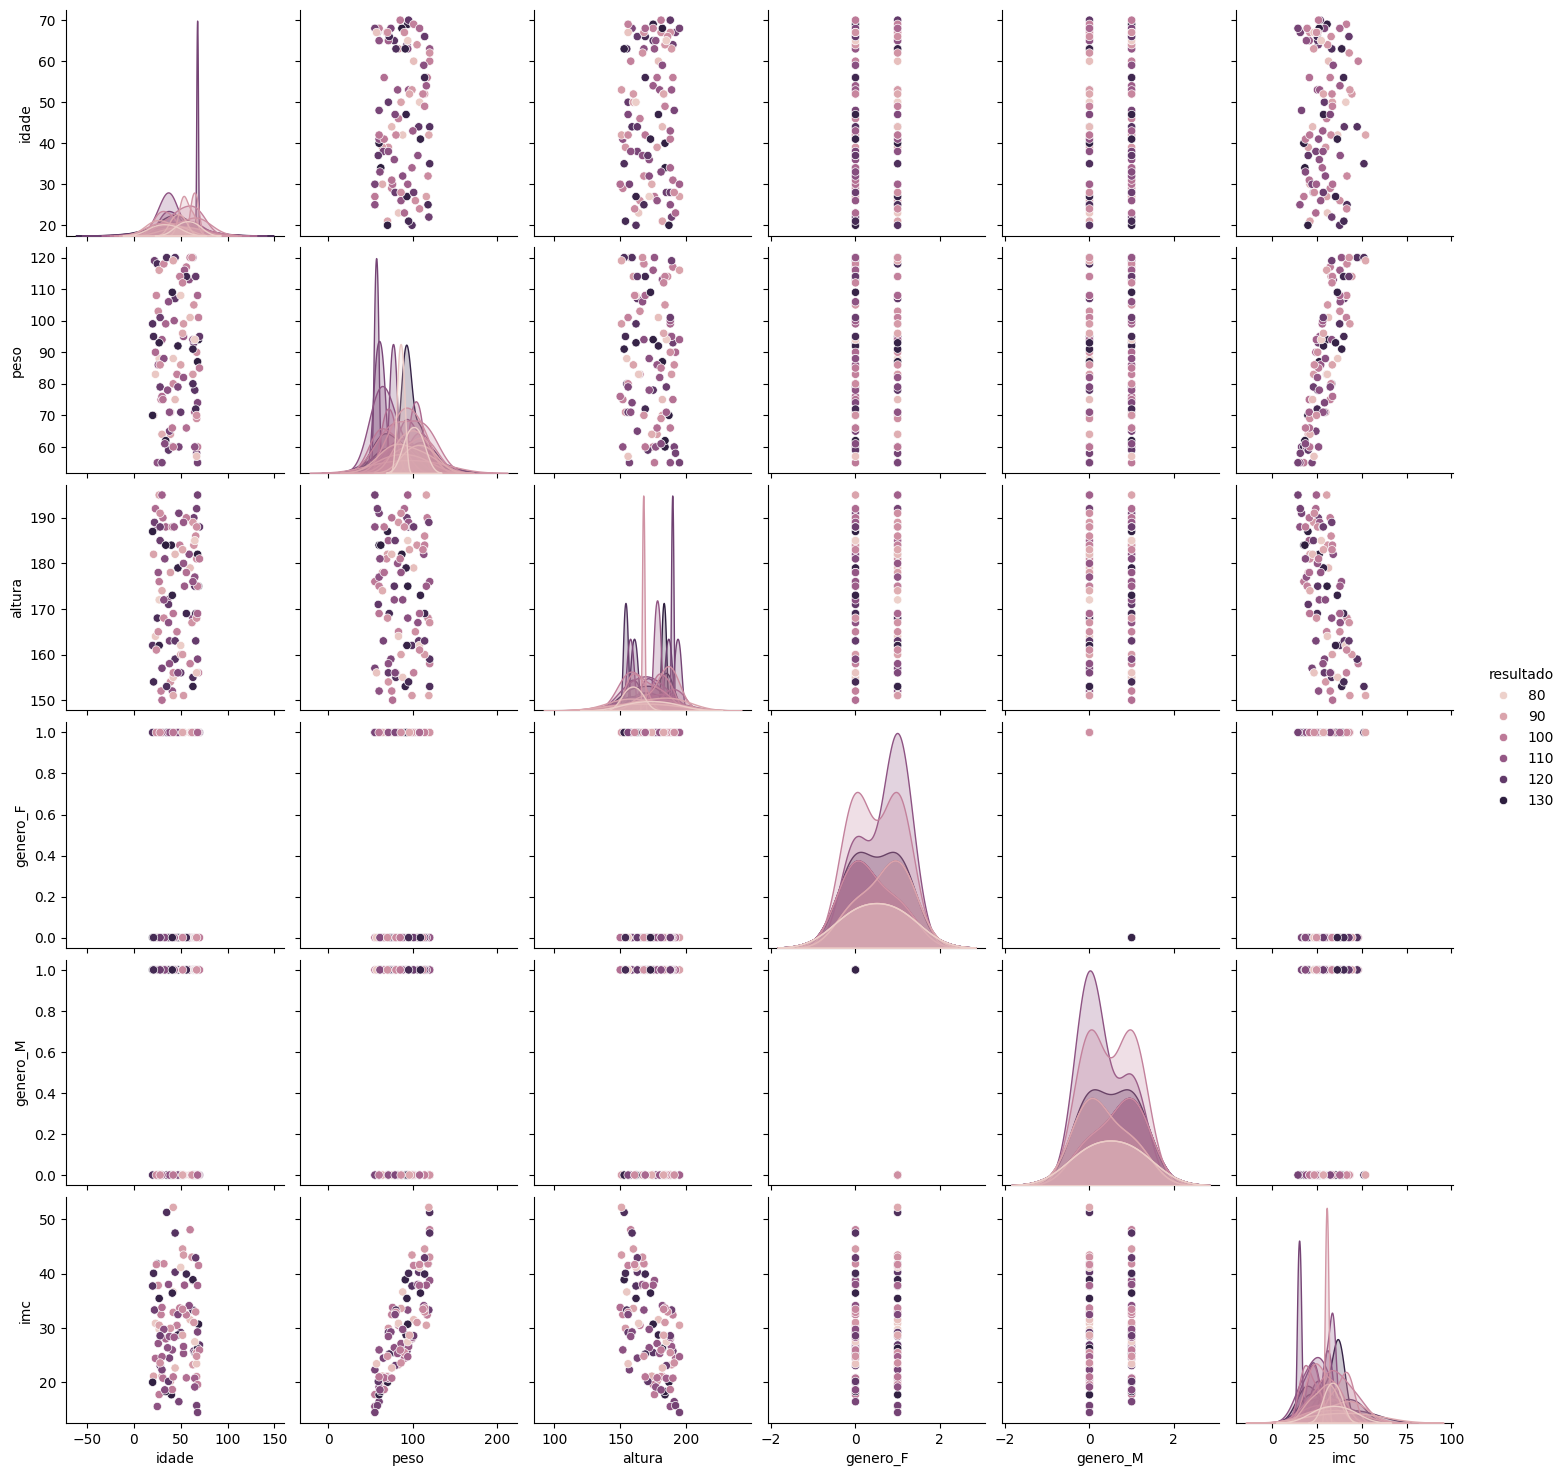

In [70]:
# Plot de Scatter (dispersão) com Distribuição
sns.pairplot(df_exames, hue='resultado')

array([[<Axes: title={'center': 'idade'}>,
        <Axes: title={'center': 'peso'}>,
        <Axes: title={'center': 'altura'}>],
       [<Axes: title={'center': 'resultado'}>,
        <Axes: title={'center': 'genero_F'}>,
        <Axes: title={'center': 'genero_M'}>],
       [<Axes: title={'center': 'imc'}>, <Axes: >, <Axes: >]],
      dtype=object)

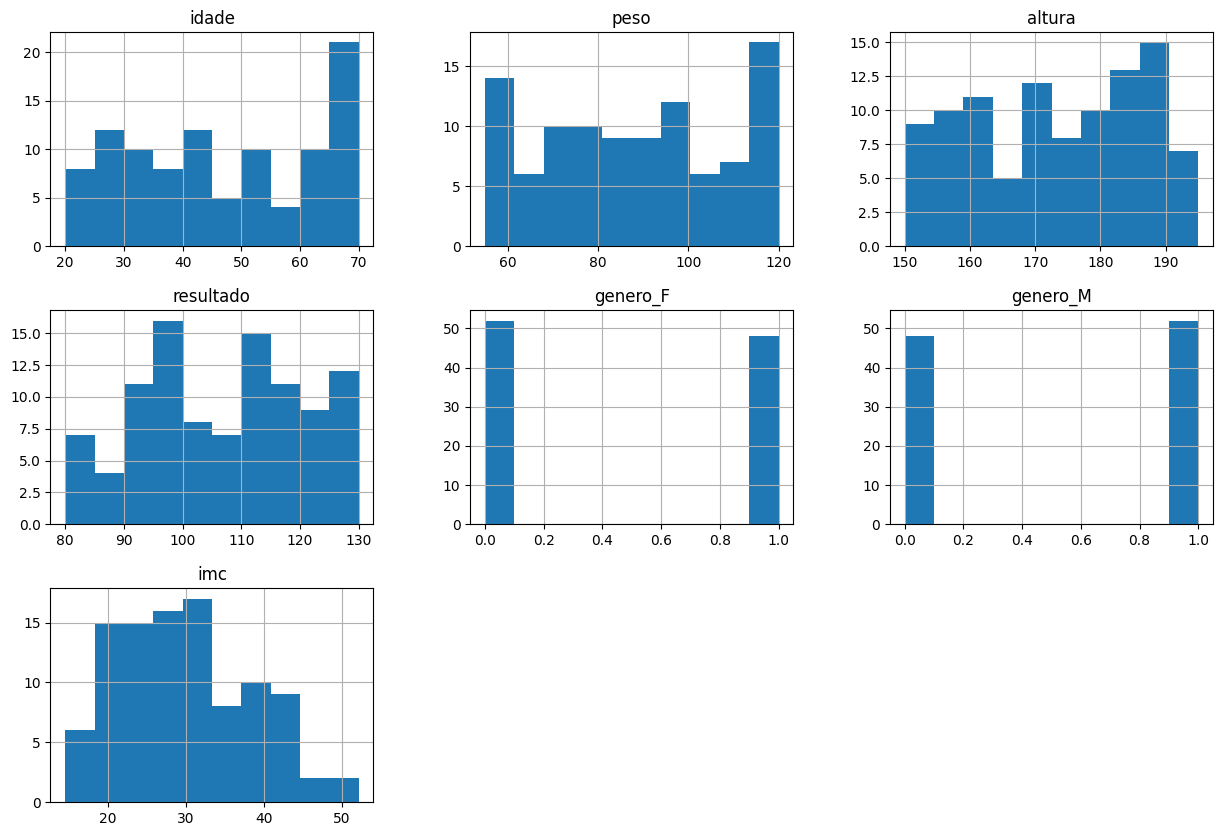

In [72]:
# Histograma de todas as variáveis
df_exames.hist(figsize=(15, 10), layout=(3, 3))

# Regressão Linear - Explicação

In [81]:
# Regressão linear
dict_regressao = {'tempo_casa': [1, 3,6,9,10,14,18], 'salario': [1500, 3000, 4500, 6000, 7000, 8500, 10000]}

In [82]:
df_regressao_simples = pd.DataFrame(dict_regressao)

In [83]:
df_regressao_simples

,tempo_casa,salario
0,1,1500
1,3,3000
2,6,4500
3,9,6000
4,10,7000
5,14,8500
6,18,10000


<Axes: xlabel='tempo_casa', ylabel='salario'>

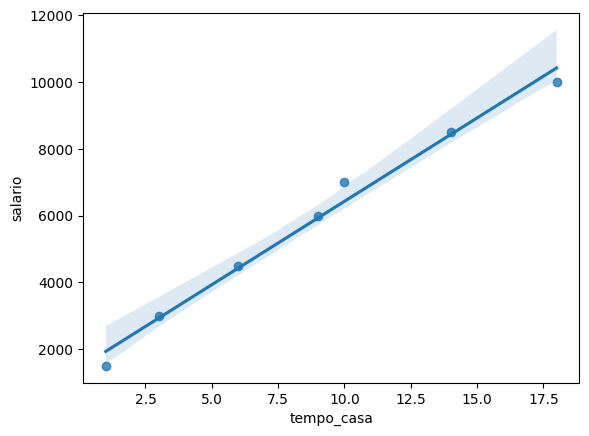

In [84]:
sns.regplot(x='tempo_casa', y='salario', data=df_regressao_simples)

In [85]:
# Equação da reta
# y = a + bx

In [88]:
# importar bibliotecas do sklearn
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, r2_score

In [92]:
# Modelo 1 - Sem IMC
X = df_exames.drop(['resultado', 'imc'], axis=1)
y = df_exames['resultado']

In [109]:
# Dividir conjunto entre treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.7, random_state=51)

In [117]:
len(X_train)

30

In [119]:
len(X_test)

70